In [1]:
#
# Project 2, starter code Part a
# Edward Christopher U1720912K
#

import math
import tensorflow as tf
import numpy as np
import pylab as plt
import pickle

NUM_CLASSES = 10
IMG_SIZE = 32
NUM_CHANNELS = 3
learning_rate = 0.001
epochs = 300
batch_size = 128

from keras import layers
from keras import models
import os, shutil
from keras import optimizers
from keras import callbacks, losses

import random , os
import multiprocessing as mp
from queue import Empty
import math
import time

class Test1(callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if epochs % 25 == 0:
          print("epochs", epochs, logs['loss'], logs['val_loss'], logs['acc'], logs['val_acc']) #a random function

b = Test1()


Using TensorFlow backend.


In [0]:
seed = 10
np.random.seed(seed)
tf.set_random_seed(seed)

def load_data(file):
    with open(file, 'rb') as fo:
        try:
            samples = pickle.load(fo)
        except UnicodeDecodeError:  #python 3.x
            fo.seek(0)
            samples = pickle.load(fo, encoding='latin1')

    data, labels = samples['data'], samples['labels']

    data = np.array(data, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)

    
    labels_ = np.zeros([labels.shape[0], NUM_CLASSES])
    labels_[np.arange(labels.shape[0]), labels-1] = 1

    return data, labels_

In [3]:
# load data 
trainX, trainY = load_data('data_batch_1')
print(trainX.shape, trainY.shape)
testX, testY = load_data('test_batch_trim')
print(testX.shape, testY.shape)
trainX = (trainX - np.min(trainX, axis = 0))/np.max(trainX, axis = 0)
testX = (testX - np.min(testX, axis = 0))/np.max(testX, axis = 0)
trainX = trainX.reshape(-1, IMG_SIZE, IMG_SIZE, NUM_CHANNELS)
testX = testX.reshape(-1, IMG_SIZE, IMG_SIZE, NUM_CHANNELS)

(10000, 3072) (10000, 10)
(2000, 3072) (2000, 10)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








epochs 0 2.2911580574035644 2.243159923553467 0.1489 0.1659999998807907
epochs 25 1.8099534854888917 1.8488215599060058 0.3638 0.3480000002384186
epochs 50 1.6757771629333496 1.7569532642364503 0.4141 0.39450000047683714
epochs 75 1.5837721992492675 1.6956735982894897 0.4494 0.39649999952316284
epochs 100 1.508306667137146 1.6404020385742188 0.4799 0.42850000023841855
epochs 125 1.446791318511963 1.6579056606292724 0.498 0.40999999952316285
epochs 150 1.399183780860901 1.5566707010269165 0.5174 0.4615
epochs 175 1.3457945365905761 1.5736338434219361 0.5396 0.4525
epochs 200 1.3057900972366332 1.5785133275985719 0.5558 0.44999999952316283
epochs 225 1.2643269073486327 1.5760084371566772 0.5659 0.44800000023841857
epochs 250 1.2175041036605836 1.8206340522766113 0.5882 0.377
epochs 275 1.188392409133911 1.627909414291382 0.5979 0.44699999976158145


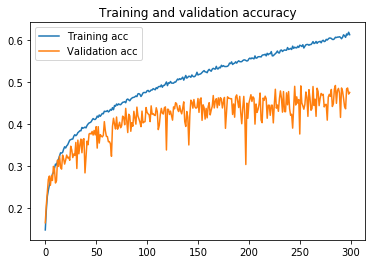

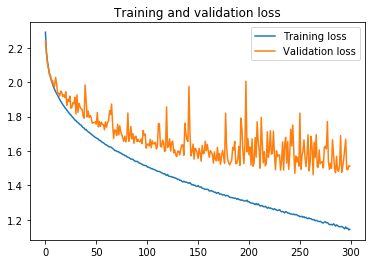

In [4]:
#Initial model (Epochs are constantly modified)
model = models.Sequential()
model.add(layers.Conv2D(50, (9, 9),activation='relu', padding="valid", kernel_initializer="he_uniform",
                       input_shape= (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2), padding="valid", strides=2))
model.add(layers.Conv2D(60, (5, 5), activation='relu', padding="valid", kernel_initializer="he_uniform",))
model.add(layers.MaxPooling2D((2, 2), padding="valid", strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(300, kernel_initializer="he_uniform"))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.SGD(lr=1e-3), 
              metrics=['accuracy'])

result = model.fit(trainX,
              trainY,
              epochs=600,
              batch_size=128,
              verbose=0,
              validation_data=(testX, testY),
              callbacks=[b])

import matplotlib.pyplot as plt
acc = result.history['acc']
val_acc = result.history['val_acc']
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
#GET 2 random images
def format_rnd_images(num_of_img):
    comp = []
    for i in range(num_of_img):
        ind = np.random.randint(low=0, high=10000)
        X = trainX[ind]

        X_show = X.reshape(NUM_CHANNELS, IMG_SIZE, IMG_SIZE).transpose(1, 2, 0)
        comp.append(X_show)
    return comp



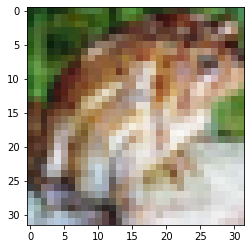

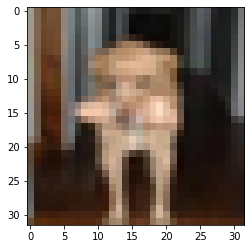

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 50)        12200     
Total params: 12,200
Trainable params: 12,200
Non-trainable params: 0
_________________________________________________________________
(24, 24, 50)
(24, 24, 50)


<Figure size 432x288 with 0 Axes>

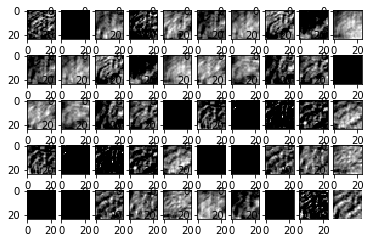

<Figure size 432x288 with 0 Axes>

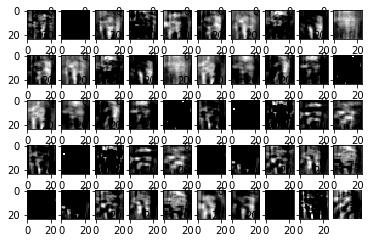

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 50)        12200     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 50)        0         
Total params: 12,200
Trainable params: 12,200
Non-trainable params: 0
_________________________________________________________________
(12, 12, 50)
(12, 12, 50)


<Figure size 432x288 with 0 Axes>

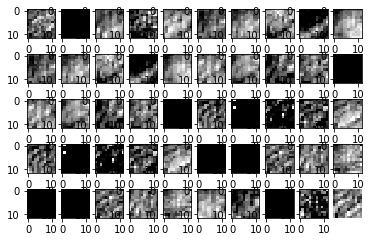

<Figure size 432x288 with 0 Axes>

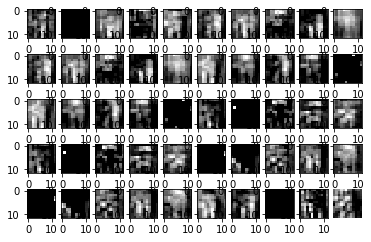

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 50)        12200     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 60)          75060     
Total params: 87,260
Trainable params: 87,260
Non-trainable params: 0
_________________________________________________________________
(8, 8, 60)
(8, 8, 60)


<Figure size 432x288 with 0 Axes>

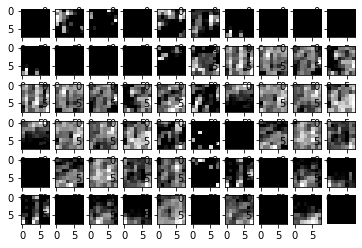

<Figure size 432x288 with 0 Axes>

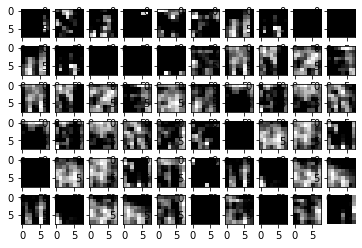

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 50)        12200     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 60)          75060     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 60)          0         
Total params: 87,260
Trainable params: 87,260
Non-trainable params: 0
_________________________________________________________________
(4, 4, 60)
(4, 4, 60)


<Figure size 432x288 with 0 Axes>

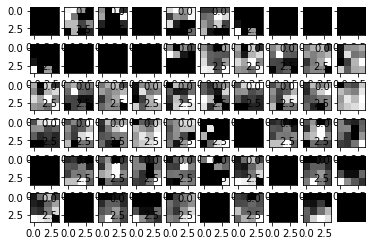

<Figure size 432x288 with 0 Axes>

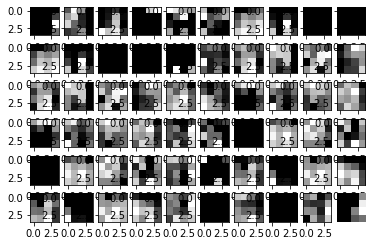

In [6]:
# FEATURE MAP
# Uses intial model (model=model)
from keras.models import Model
import keras.backend as K
comp = format_rnd_images(2)
for i in comp:
    plt.figure()
    plt.imshow(i)
    plt.show()
for lay in range(4):
    model2 = Model(inputs=model.inputs, outputs=model.layers[lay].output)
    model2.summary()
    for asdf in comp:
      plt.figure()
      plt.gray()
      fmaps = model2.predict(np.array([asdf]))
      for fmap in fmaps:
            panjang = fmap.shape[2]//10
            print(fmap.shape)
            f, axarr = plt.subplots(panjang, 10)  
            for i in range(panjang):
                for j in range(10):         
                    axarr[i, j].imshow(fmap[:, :, i*panjang+j])
                    plt.axis('off')

    plt.show()
    

In [0]:
# Grid Search
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

acc_list = {}
def create_model(n1, n2):
    model = models.Sequential()
    model.add(layers.Conv2D(n1, (9, 9), activation='relu', padding="valid",
                          input_shape= (32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2), padding="valid", strides=2))
    model.add(layers.Conv2D(n2, (5, 5), activation='relu', padding="valid"))
    model.add(layers.MaxPooling2D((2, 2), padding="valid", strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(300))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizers.SGD(lr=1e-3), 
                  metrics=['accuracy'])
    
    return model
def fit_mdl(param):
    modelMF = create_model(param[0], param[1])
    print(param)
    result = modelMF.fit(trainX,
              trainY,
              epochs=100,
              batch_size=128,
              verbose=1,
              validation_data=(testX, testY), 
              shuffle = True)
    print(param[0], param[1], result.history['val_acc'][-1])
    return [param[0], param[1], result.history]
# Set neurons here (changed frequently)
neurons = [16, 32, 50, 64, 128]
final = []
neuron_pairs = []
for i in neurons:
    for j in neurons:
        if i >=j:
            continue
        neuron_pairs.append([i,j]) # only for i<=j, adjusted after 1st expt
# For manually inputted neuron pairs
# neuron_pairs = [[50, 70], [50,90]]
for i in neuron_pairs:
    final.append(fit_mdl(i))

# MULTIPROCESSING USES
#p = mp.Pool(processes=4)
#final = p.map(fit_mdl, neuron_pairs)

In [0]:
# PRINTING METHOD for grid search
johnson = {}
maxx = -1
ads = (0, 0)
final = i
print(final)
for x in range(1):
    if i[2]['val_acc'][-1] > maxx:
        maxx = i[2]['val_acc'][-1]
        ads = (i[0], i[1])
    johnson[i[0], i[1]] = {'acc' : i[2]['acc'], 'val_acc' : i[2]['val_acc']}
epochs = range(100)
for key, value in johnson.items():
    plt.figure()
    plt.plot(epochs, value['acc'], label='Training acc')
    plt.plot(epochs, value['val_acc'], label='Validation acc')
    plt.title('Neurons = ' + str(key) + ' Accuracy')
    plt.legend()
    plt.show()

for key, value in johnson.items():
    print(key, value['val_acc'][-1])

momentum
epochs 0 2.3194648181915283 2.2134180335998535 0.1391 0.1765000001192093
epochs 25 1.7535963527679443 1.7927182140350342 0.3837 0.36500000023841855
epochs 50 1.6125500497817993 1.7761688623428344 0.4415 0.383
epochs 75 1.5159222091674804 1.6211723384857177 0.4793 0.43850000023841856
epochs 100 1.4334096431732177 1.605866240501404 0.5143 0.44
epochs 125 1.3654520755767823 1.5363477325439454 0.537 0.4809999997615814
epochs 150 1.3026660671234132 1.5324321146011353 0.558 0.4569999997615814
epochs 175 1.2528716348648072 1.571405068397522 0.5752 0.45600000047683714
epochs 200 1.205094877243042 1.7195318298339843 0.5917 0.4475
epochs 225 1.1551462646484374 1.5118377590179444 0.6078 0.46799999952316285
epochs 250 1.1053622032165527 1.7679120473861694 0.6293 0.409
epochs 275 1.0636556581497192 1.4664361791610718 0.6463 0.5075
epochs 300 1.016721417427063 1.5305713119506836 0.6616 0.46599999952316284
epochs 325 0.9778814080238343 1.45100940990448 0.6773 0.49149999952316287
epochs 350 0

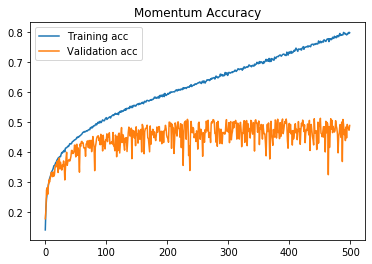

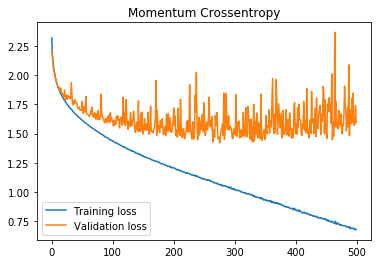

In [30]:
# add momentum
modelX = models.Sequential()
modelX.add(layers.Conv2D(50, (9, 9),activation='relu', padding="valid", kernel_initializer="he_uniform",
                       input_shape= (32, 32, 3)))
modelX.add(layers.MaxPooling2D((2, 2), padding="valid", strides=2))
modelX.add(layers.Conv2D(100, (5, 5), activation='relu', padding="valid", kernel_initializer="he_uniform",))
modelX.add(layers.MaxPooling2D((2, 2), padding="valid", strides=2))
modelX.add(layers.Flatten())
modelX.add(layers.Dense(300, kernel_initializer="he_uniform"))
modelX.add(layers.Dense(10, activation='softmax'))

modelX.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.SGD(lr=1e-3, momentum=0.1), 
              metrics=['accuracy'])

print("momentum")
resultM = modelX.fit(trainX,
              trainY,
              epochs=500,
              batch_size=128,
              verbose=0,
              validation_data=(testX, testY), 
              shuffle = True,
              callbacks=[b])
epochs = range(500)
plt.figure()
plt.plot(epochs, resultM.history['acc'], label='Training acc')
plt.plot(epochs, resultM.history['val_acc'], label='Validation acc')
plt.title('Momentum Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, resultM.history['loss'], label='Training loss')
plt.plot(epochs, resultM.history['val_loss'], label='Validation loss')
plt.title('Momentum Crossentropy')
plt.legend()
plt.show()


In [0]:
# RMSprop
modelX = models.Sequential()
modelX.add(layers.Conv2D(50, (9, 9),activation='relu', padding="valid", kernel_initializer="he_uniform",
                       input_shape= (32, 32, 3)))
modelX.add(layers.MaxPooling2D((2, 2), padding="valid", strides=2))
modelX.add(layers.Conv2D(100, (5, 5), activation='relu', padding="valid", kernel_initializer="he_uniform",))
modelX.add(layers.MaxPooling2D((2, 2), padding="valid", strides=2))
modelX.add(layers.Flatten())
modelX.add(layers.Dense(300, kernel_initializer="he_uniform"))
modelX.add(layers.Dense(10, activation='softmax'))

modelX.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-3), 
              metrics=['accuracy'])

print("RMSProp")
resultRMS = modelX.fit(trainX,
              trainY,
              epochs=200,
              batch_size=128,
              verbose=1,
              validation_data=(testX, testY), 
              shuffle = True)

epochs = range(200)
plt.figure()
plt.plot(epochs, resultRMS.history['acc'], label='Training acc')
plt.plot(epochs, resultRMS.history['val_acc'], label='Validation acc')
plt.title('RMSprop Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, resultRMS.history['loss'], label='Training loss')
plt.plot(epochs, resultRMS.history['val_loss'], label='Validation loss')
plt.title('RMSprop Crossentropy')
plt.legend()
plt.show()


In [0]:
# Adam optimizer
modelX = models.Sequential()
modelX.add(layers.Conv2D(50, (9,9),activation='relu', padding="valid", kernel_initializer="he_uniform",
                       input_shape= (32, 32, 3)))
modelX.add(layers.MaxPooling2D((2, 2), padding="valid", strides=2))
modelX.add(layers.Conv2D(100, (5,5), activation='relu', padding="valid", kernel_initializer="he_uniform",))
modelX.add(layers.MaxPooling2D((2, 2), padding="valid", strides=2))
modelX.add(layers.Flatten())
modelX.add(layers.Dense(300, kernel_initializer="he_uniform"))
modelX.add(layers.Dense(10, activation='softmax'))

modelX.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(lr=1e-3), 
              metrics=['accuracy'])

print("Adam optimizer")
resultAO = modelX.fit(trainX,
              trainY,
              epochs=50,
              batch_size=128,
              verbose=1,
              validation_data=(testX, testY), 
              shuffle = True,
              callbacks=[b])

epochs = range(50)
plt.figure()
plt.plot(epochs, resultAO.history['acc'], label='Training acc')
plt.plot(epochs, resultAO.history['val_acc'], label='Validation acc')
plt.title('Adam Opt Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, resultAO.history['loss'], label='Training loss')
plt.plot(epochs, resultAO.history['val_loss'], label='Validation loss')
plt.title('Adam Opt Crossentropy')
plt.legend()
plt.show()

In [0]:
# Dropout
modelX = models.Sequential()
modelX.add(layers.Conv2D(50, (9, 9),activation='relu', padding="valid", kernel_initializer="he_uniform",
                       input_shape= (32, 32, 3)))
modelX.add(layers.Dropout(0.2))
modelX.add(layers.MaxPooling2D((2, 2), padding="valid", strides=2))
modelX.add(layers.Conv2D(100, (5, 5), activation='relu', padding="valid", kernel_initializer="he_uniform",))
modelX.add(layers.Dropout(0.2))
modelX.add(layers.MaxPooling2D((2, 2), padding="valid", strides=2))
modelX.add(layers.Flatten())
modelX.add(layers.Dense(300, kernel_initializer="he_uniform"))
modelX.add(layers.Dropout(0.3))
modelX.add(layers.Dense(10, activation='softmax'))

modelX.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.SGD(lr=1e-3), 
              metrics=['accuracy'])

print("Dropout")
resultDO = modelX.fit(trainX,
              trainY,
              epochs=300,
              batch_size=128,
              verbose=1,
              validation_data=(testX, testY), 
              shuffle = True)

epochs = range(300)
plt.figure()
plt.plot(epochs, resultDO.history['acc'], label='Training acc')
plt.plot(epochs, resultDO.history['val_acc'], label='Validation acc')
plt.title('Dropout Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, resultDO.history['loss'], label='Training loss')
plt.plot(epochs, resultDO.history['val_loss'], label='Validation loss')
plt.title('Dropout Crossentropy')
plt.legend()
plt.show()

In [37]:
# better model
# https://stats.stackexchange.com/questions/272607/cifar-10-cant-get-above-60-accuracy-keras-with-tensorflow-backend
# adjusted for current data inputs
from keras.layers import *
model = models.Sequential()
model.add(Conv2D(filters=32, 
                 use_bias=True, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64, use_bias=False, kernel_size=(5,5), strides=2))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

n_epochs = 25
batch_size = 128
H = model.fit(trainX, trainY, validation_data=(testX, testY), 
              epochs=n_epochs, batch_size=batch_size, verbose=1)


Train on 10000 samples, validate on 2000 samples
Epoch 1/25
10000/10000 [==============================] - 5s 501us/step - loss: 2.0092 - acc: 0.2747 - val_loss: 1.7183 - val_acc: 0.4155
Epoch 2/25
10000/10000 [==============================] - 2s 177us/step - loss: 1.6791 - acc: 0.4019 - val_loss: 1.5633 - val_acc: 0.4560
Epoch 3/25
10000/10000 [==============================] - 2s 175us/step - loss: 1.5438 - acc: 0.4600 - val_loss: 1.4557 - val_acc: 0.5005
Epoch 4/25
10000/10000 [==============================] - 2s 178us/step - loss: 1.4324 - acc: 0.4958 - val_loss: 1.3856 - val_acc: 0.5250
Epoch 5/25
10000/10000 [==============================] - 2s 177us/step - loss: 1.3670 - acc: 0.5211 - val_loss: 1.4240 - val_acc: 0.5000
Epoch 6/25
10000/10000 [==============================] - 2s 175us/step - loss: 1.2633 - acc: 0.5517 - val_loss: 1.3427 - val_acc: 0.5470
Epoch 7/25
10000/10000 [==============================] - 2s 176us/step - loss: 1.1805 - acc: 0.5873 - val_loss: 1.3974 - v

In [0]:
# GRIDSEARCH CV 
# NOT USED
trainX, trainY = load_data('data_batch_1')
print(trainX.shape, trainY.shape)
testX, testY = load_data('test_batch_trim')
print(testX.shape, testY.shape)

trainX = (trainX - np.min(trainX, axis = 0))/np.max(trainX, axis = 0)
testX = (testX - np.min(testX, axis = 0))/np.max(testX, axis = 0)

trainX = trainX.reshape(-1, IMG_SIZE, IMG_SIZE, NUM_CHANNELS)
testX = testX.reshape(-1, IMG_SIZE, IMG_SIZE, NUM_CHANNELS)

#BROKE THE DATA
trainGS = np.concatenate((trainX, testX), axis=0)
labelGS = np.concatenate((trainY, testY), axis=0)

test_fold = np.repeat([-1, 0], [10000, 2000])
ps = PredefinedSplit(test_fold)
ps.get_n_splits()

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=128, verbose=0, callbacks=[b])
neurons = [1, 20, 30, 40, 50, 60, 70]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=None, verbose=0)
grid_result = grid.fit(trainGS, labelGS)

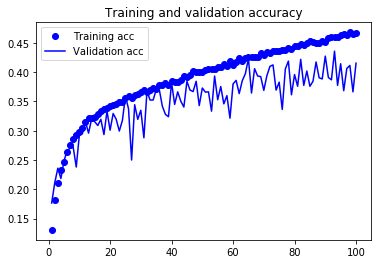

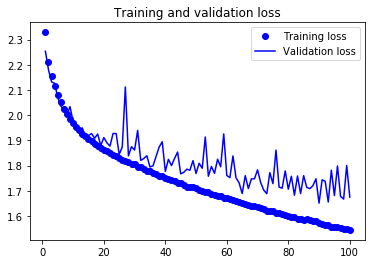

In [0]:
# Plot function
import matplotlib.pyplot as plt
acc = result.history['acc']
val_acc = result.history['val_acc']
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [0]:
# original tf code (not used)
def cnn(images):

    images = tf.reshape(images, [-1, IMG_SIZE, IMG_SIZE, NUM_CHANNELS])
    
    #Conv 1
    W1 = tf.Variable(tf.truncated_normal([9, 9, NUM_CHANNELS, 50], stddev=1.0/np.sqrt(NUM_CHANNELS*9*9)), name='weights_1')
    b1 = tf.Variable(tf.zeros([50]), name='biases_1')

    conv_1 = tf.nn.relu(tf.nn.conv2d(images, W1, [1, 1, 1, 1], padding='VALID') + b1)
    pool_1 = tf.nn.max_pool(conv_1, ksize= [1, 2, 2, 1], strides= [1, 2, 2, 1], padding='VALID', name='pool_1')

    dim = pool_1.get_shape()[1].value * pool_1.get_shape()[2].value * pool_1.get_shape()[3].value 
    pool_1_flat = tf.reshape(pool_1, [-1, dim])
	
    #Softmax
    W2 = tf.Variable(tf.truncated_normal([dim, NUM_CLASSES], stddev=1.0/np.sqrt(dim)), name='weights_3')
    b2 = tf.Variable(tf.zeros([NUM_CLASSES]), name='biases_3')
    logits = tf.matmul(pool_1_flat, W2) + b2

    return logits


def main():

    trainX, trainY = load_data('data_batch_1')
    print(trainX.shape, trainY.shape)
    
    testX, testY = load_data('test_batch_trim')
    print(testX.shape, testY.shape)

    trainX = (trainX - np.min(trainX, axis = 0))/np.max(trainX, axis = 0)

    # Create the model
    x = tf.placeholder(tf.float32, [None, IMG_SIZE*IMG_SIZE*NUM_CHANNELS])
    y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES])

    
    logits = cnn(x)

    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=logits)
    loss = tf.reduce_mean(cross_entropy)

    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    N = len(trainX)
    idx = np.arange(N)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for e in range(epochs):
            np.random.shuffle(idx)
            trainX, trainY = trainX[idx], trainY[idx]

            _, loss_ = sess.run([train_step, loss], {x: trainX, y_: trainY})

            print('epoch', e, 'entropy', loss_)


    ind = np.random.randint(low=0, high=10000)
    X = trainX[ind,:]
    
    plt.figure()
    plt.gray()
    X_show = X.reshape(NUM_CHANNELS, IMG_SIZE, IMG_SIZE).transpose(1, 2, 0)
    plt.axis('off')
    plt.imshow(X_show)
    plt.savefig('./p1b_2.png')


if __name__ == '__main__':
  main()
